<a href="https://colab.research.google.com/github/zqiaohe/100daysofcoding/blob/master/%D0%94%D0%B5%D0%BD%D1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Овечки](https://kulturologia.ru/files/u18046/Blacknose-Sheep-16.jpg)

# **План на день первый:**


*   PyTorch
*   Скачать Анаконду на этот комп +
*   Сделать специальный репозиторий для подобной плановой фигни
*   Описать себе подробно прототип кинотеатра и образовательного сайта по китайскому
*   Сделать степиковский питонмашобуч один модуль и сохранить код в специальный ноутбук




![alt text](https://images2.popmeh.ru/upload/img_cache/dc8/dc850367cc0567661c05a5af00c23781_fitted_800x3000.jpg)

#PyTorch:
* [Основы PyTorch ](https://colab.research.google.com/drive/1XENw9khgtftfaCB5P3CzyxLnAWLX2MX1)
*  [Один нейрон на PyTorch](https://colab.research.google.com/drive/1YTX4LCOcrzNy_UTyMjYG8cBHFiTAVcZy)
*  [Сетка на PyTorch](https://colab.research.google.com/drive/1VBGpsN1n70YHtGPOzQsMkf9-AOzqBb-3#scrollTo=nJblXqY5YJdE)


##Основы

###База:

In [0]:
# Для того, чтобы "import torch" работал в колабе
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch


In [0]:
torch.HalfTensor      # 16 бит, с плавающей точкой
torch.FloatTensor     # 32 бита,  с плавающей точкой
torch.DoubleTensor    # 64 бита, с плавающей точкой

torch.ShortTensor     # 16 бит, целочисленный, знаковый
torch.IntTensor       # 32 бита, целочисленный, знаковый
torch.LongTensor      # 64 бита, целочисленный, знаковый

torch.CharTensor      # 8 бит, целочисленный, знаковый
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

torch.ByteTensor

In [0]:
x = torch.IntTensor(3, 2, 4) # сохдание тензора определённой формы, заполненного рандомно
x

In [0]:
x = torch.IntTensor(3, 2, 4).zero_() #то же, но заполненного нулями
x

In [0]:
x = torch.FloatTensor(2,3,4) 
x

In [0]:
x = torch.IntTensor(45, 57, 14, 2) # посмотреть форму тензора
x.shape

In [0]:
b = torch.FloatTensor([[1,2,3], [4,5,10000000000]])
b

In [0]:
b.view(3, 2) #изменить форму *создаёт новый тензор*

In [0]:
b.view(-1)

In [0]:
b.type_as(torch.ByteTensor()) #изменение типа тензора

In [0]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

###Задача 1
1. Создайте два вещественных тензора: a размером (3, 4) и b размером (12,)
2. Создайте тензор c, являющийся тензором b, но размера (2, 2, 3)
3. Выведите первый столбец матрицы a с помощью индексации

In [0]:
a = torch.FloatTensor(3,4) #1.1 задание
a

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])

In [0]:
b = torch.FloatTensor(12,) #1.2
b

In [0]:
c = b.view(2,2,3) #2 задание
c

tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]]])

In [0]:
a[0:3, 0:1]

tensor([[0.0000],
        [0.0000],
        [0.0000]])

**Арифметика и булевы операции** работаю также, как и в NumPy, **НО** лучше использовать не опреаторы `+`, `-`, `*`, `/`, а их аналоги:  

| Оператор | Аналог |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [0]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [0]:
a.add(b)

In [0]:
a.sub(b)

In [0]:
a.mul(b)

In [0]:
a.div(b)

### Задача 2
1. Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2. Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3. Произведите все арифметические операции с тензорами `a` и `c`

In [0]:
a = torch.FloatTensor([[0, 0],[1, 1],[2, 2],[3, 3],[4, 4]])
b = torch.FloatTensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
a

tensor([[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.]])

In [0]:
c = b.view(5,2)
c

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]])

In [0]:
a.add(c)

tensor([[-1., -1.],
        [ 0.,  0.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.]])

In [0]:
a.sub(c)

tensor([[1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.]])

In [0]:
a.div(c)

tensor([[-0., -0.],
        [-1., -1.],
        [-2., -2.],
        [-3., -3.],
        [-4., -4.]])

In [0]:
a.mul(c)

tensor([[-0., -0.],
        [-1., -1.],
        [-2., -2.],
        [-3., -3.],
        [-4., -4.]])

**Операторы сравнения**:

In [0]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [0]:
a == b

tensor([[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [0]:
a != b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [0]:
a < b

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

In [0]:
a > b

tensor([[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]], dtype=torch.uint8)

**Булевы маски**:

In [0]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [0]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [0]:

a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [0]:
b[a == b]

tensor([100., 200., 300.])

**Стандартные функции**:

In [0]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [0]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [0]:
a.cos()

tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.8391,  0.4081,  0.1543],
        [ 0.8623,  0.4872, -0.0221]])

In [0]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [0]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [0]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

**Сумма, среднее, максимум, минимум**:

In [0]:
a.sum()

tensor(666.)

In [0]:
a.mean()

tensor(74.)

In [0]:
a.sum(0) # по вертикальной оси

tensor([111., 222., 333.])

In [0]:
a.sum(1)

tensor([  6.,  60., 600.])

In [0]:
a.max()

tensor(300.)

In [0]:
a.min(0)

(tensor([1., 2., 3.]), tensor([0, 0, 0]))

###Задача 3

Создайте тензор a размерности (100, 780, 780, 3) (можно интерпретировать это как 100 картинок размера 780х780 с тремя цветовыми каналами) и выведите первый элемент этого тензора как картинку (с помощью matplotlib.pyplot).

Выведите среднее элементов по 1-ой оси (по сути - средняя картинка по всем картинкам) и по 4-ой оси (по сути - усреднение каналов для каждой картинки).

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [0]:
a = torch.FloatTensor(100,780,780,3)

In [0]:
a.mean(0).shape

torch.Size([780, 780, 3])

In [0]:
images = np.random.uniform(0,1, (10000,80,80,1))

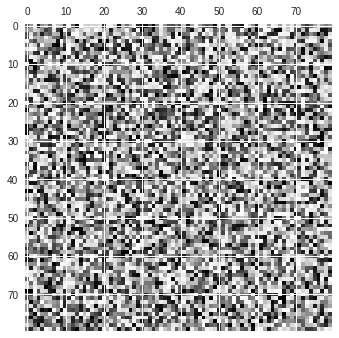

In [0]:
img = images[0].reshape(80,80)
plt.matshow(img)
plt.show()

In [0]:
Meann = images.mean(0)

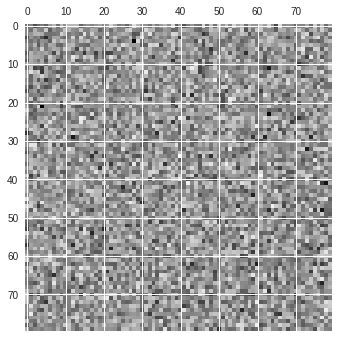

In [0]:
Meann = Meann.reshape(80,80)
plt.matshow(Meann)
plt.show()

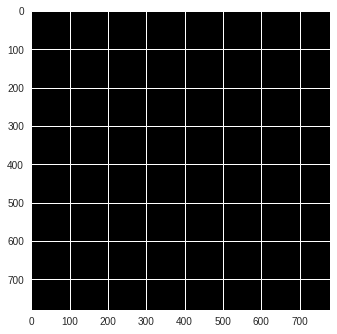

In [0]:
plt.imshow(a[0])
plt.show()

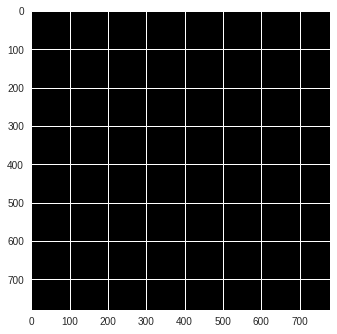

In [0]:
plt.imshow(a.mean(0))
plt.show()

TypeError: ignored

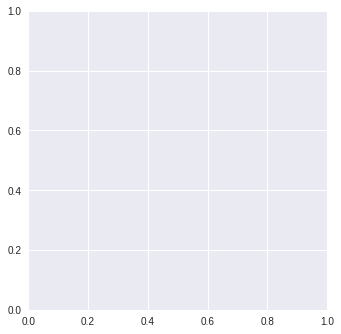

In [0]:
plt.imshow(a.mean(3))
plt.show()

### Задача 4
Напишите функцию `forward_pass(X, w)` ($w_0$ входит в $w$) для одного нейрона (с сигмоидой) с помощью PyTorch (у вас уже должен быть код на NumPy).

In [0]:
def forward_pass(X, w):
    # Ваш код здесь
    b = torch.FloatTensor(X.shape).uniform_()
    return (X @ w).add_(b)

In [0]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))
b = torch.FloatTensor(X.shape).uniform_()
b

RuntimeError: ignored

Должно получиться: 

|variable|value|
|-|-|
|**X**|torch.FloatTensor([[-5, 5], [15, 20], [100, -700]])|
|**w**|torch.FloatTensor([[-0.5], [150]])|
|**result**|torch.FloatTensor([[1.0000], [0.9985], [0.0474]])|   

##Нейрон

**Компоненты нейросети**


Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

###Задача 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("apples_pears.csv")

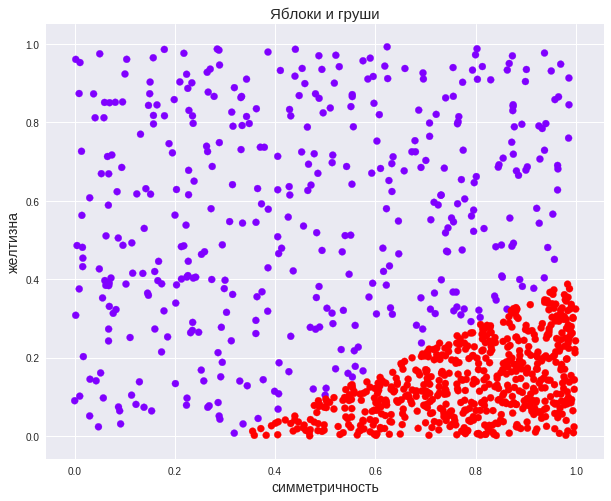

In [63]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [0]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [0]:
import torch
from torch.nn import Linear, Sigmoid

Есть **два пути объявления нейросетей** в PyTorch:  
- ***функциональный (`Functional`);***
- ***последовательный (`Sequential`);  ***

Рассмотрим второй путь (он чуть более user-friendly), к первому потом ещё вернёмся, и построим таким способом один нейрон (точно такой же, который мы реализовывали раньше с помощью Numpy):

In [0]:
num_features = X.shape[1]

neuron = torch.nn.Sequential(
    Linear(num_features, out_features=1),
    Sigmoid()
)

In [67]:
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [52]:
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

tensor([-0.3687,  1.0365, -1.1275], grad_fn=<ThAddBackward>)

In [0]:
proba_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

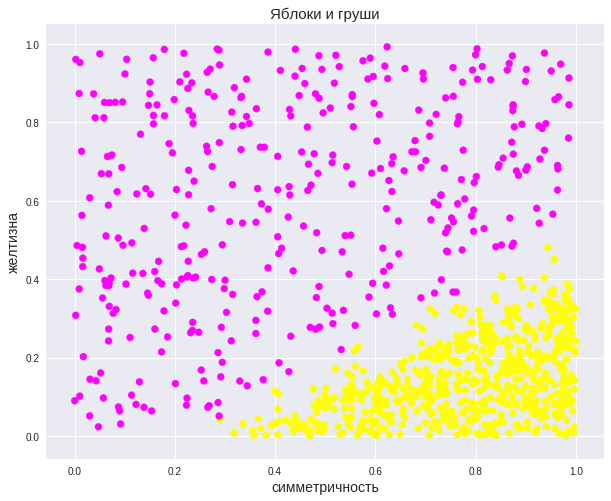

In [93]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();


In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))

y = torch.autograd.Variable(torch.FloatTensor(y))


In [181]:
# квадратичная функция потерь (можно сделать другую)
loss_fn = torch.nn.MSELoss()

# шаг градиентного спуска (точнее -- метода оптимизации)
learning_rate = 0.1  # == 1e-3
# сам метод оптимизации нейросети (обычно лучше всего по-умолчанию рабоатет Adam)
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
# итерируемся num_epochs раз, здесь 500
for t in range(30000):
    # foward_pass() -- применение нейросети (этот шаг ещё называют inference)
    y_pred = neuron(X)

    # выведем loss
    loss = loss_fn(y, y_pred)
    print('{} {}'.format(t, loss.data))

    # ВСЕГДА обнуляйте градиенты перед backard_pass'ом
    # подробнее: читайте документацию PyTorch
    optimizer.zero_grad()

    # backward_pass() -- вычисляем градиенты loss'а по параметрам (весам) нейросети
    # ВНИМАНИЕ! На это шаге мы только вычисляем градиенты, но ещё не обновляем веса
    loss.backward()

    # А вот тут уже обновляем
    optimizer.step()

0 0.9536089301109314
1 0.9536072611808777
2 0.9536054134368896
3 0.9536048173904419
4 0.9536037445068359
5 0.9536011219024658
6 0.9536016583442688
7 0.9535978436470032
8 0.9535971879959106
9 0.953596830368042
10 0.9535929560661316
11 0.9535912275314331
12 0.953591525554657
13 0.9535871744155884
14 0.9535884857177734
15 0.9535864591598511
16 0.9535844326019287
17 0.9535834193229675
18 0.9535796642303467
19 0.9535807371139526
20 0.9535775780677795
21 0.95357745885849
22 0.953574538230896
23 0.9535744190216064
24 0.9535746574401855
25 0.9535689353942871
26 0.9535707831382751
27 0.9535679221153259
28 0.953567385673523
29 0.9535647630691528
30 0.9535642266273499
31 0.9535624980926514
32 0.9535619020462036
33 0.9535582065582275
34 0.9535567164421082
35 0.9535555243492126
36 0.9535540342330933
37 0.9535527229309082
38 0.9535503387451172
39 0.953550398349762
40 0.9535496234893799
41 0.9535455107688904
42 0.9535455107688904
43 0.9535422921180725
44 0.9535428881645203
45 0.9535390734672546
46 0.

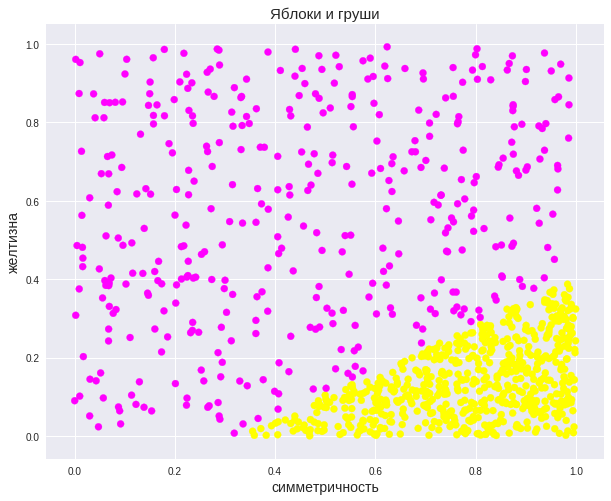

In [180]:
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

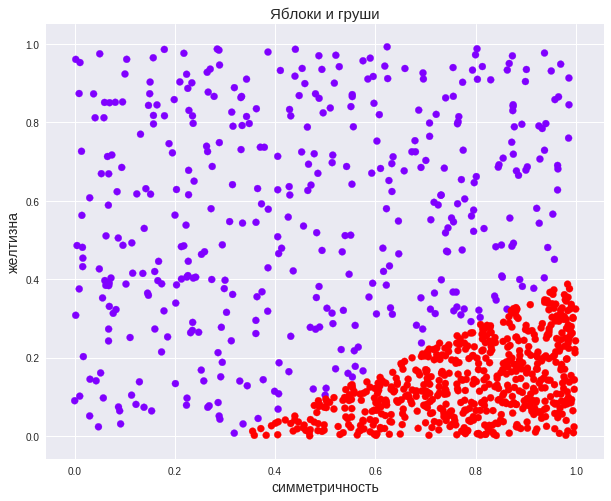

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.FloatTensor(y))


In [0]:
# квадратичная функция потерь (можно сделать другую)
loss_fn = torch.nn.NLLLoss()

# шаг градиентного спуска (точнее -- метода оптимизации)
learning_rate = 0.001  # == 1e-3
# сам метод оптимизации нейросети (обычно лучше всего по-умолчанию рабоатет Adam)
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
# итерируемся num_epochs раз, здесь 500
for t in range(500):
    # foward_pass() -- применение нейросети (этот шаг ещё называют inference)
    y_pred = neuron(X)

    # выведем loss
    loss = loss_fn(y, y_pred )
    print('{} {}'.format(t, loss.data))

    # ВСЕГДА обнуляйте градиенты перед backard_pass'ом
    # подробнее: читайте документацию PyTorch
    optimizer.zero_grad()

    # backward_pass() -- вычисляем градиенты loss'а по параметрам (весам) нейросети
    # ВНИМАНИЕ! На это шаге мы только вычисляем градиенты, но ещё не обновляем веса
    loss.backward()

    # А вот тут уже обновляем
    optimizer.step()

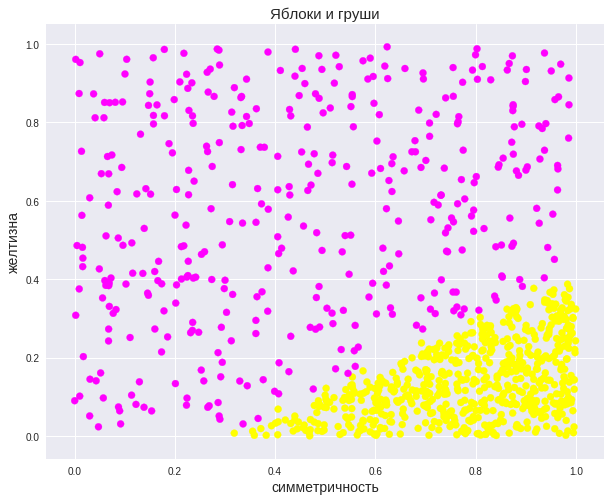

In [33]:
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

###Задача 2

Круто. Нейрон работет, отличает яблоки от груш (Вы ведь этого добились, правда?). Но так ли он силён? Давайте попробуем более сложную выборку, которая уже не разделяется линейно:

In [0]:
import numpy as np

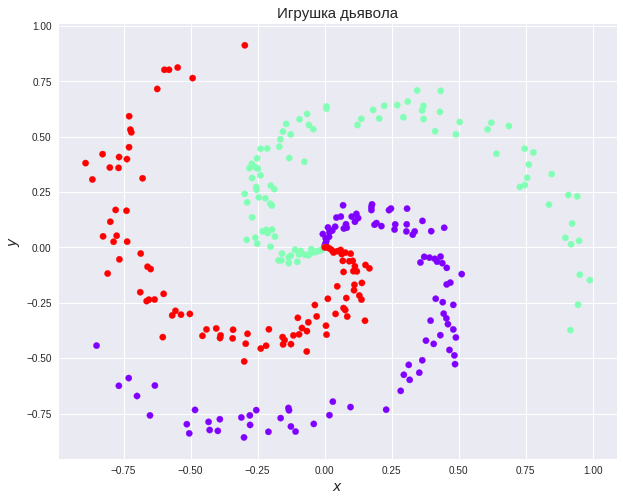

In [36]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Данные в Variable() (без этого градиенты не посчитать):

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [38]:
print(X.data.shape, y.data.shape) 

torch.Size([300, 2]) torch.Size([300])


In [0]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, D_out = 64, 2, 3

neuron = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = neuron(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

In [0]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

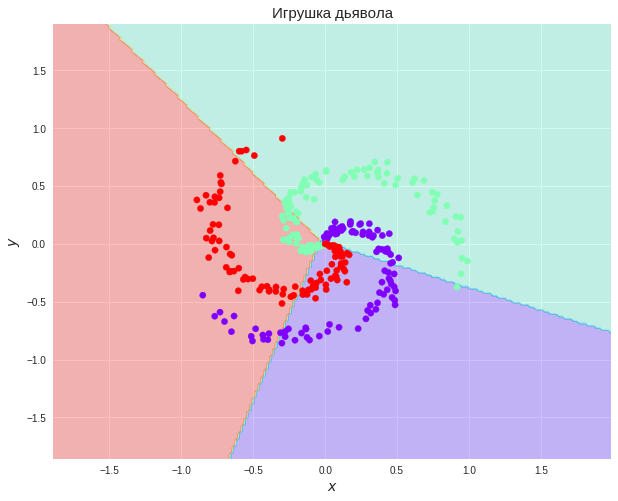

In [41]:
# Отрисовочна магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [0]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, D_out = 64, 2, 3

neuron = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = neuron(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

In [0]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

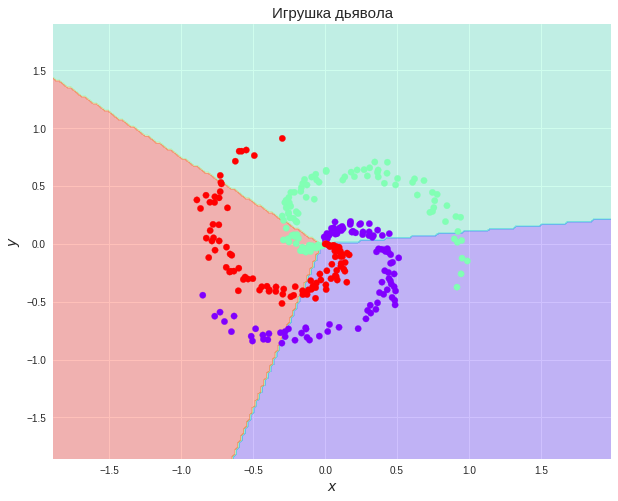

In [48]:
# Отрисовочна магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

##Сеть